Imports

In [1]:
import csv
import matplotlib.pyplot as plt
import math
from scipy.interpolate import interp1d

Defining all Variables

In [7]:
# File Names
spec_file = 'Cs-137 Work/cs-137_spectrum.csv'
xs_file = '/Users/briannaryan/Desktop/CEvNS/Detector Material Comparison/tin_xs.csv'

In [8]:
# User Defined Variables
source = 'Cs-137'
A = 112*0.0097+114*0.0065+115*0.0034+116*0.1454+117*0.0768+118*0.2422+119*0.0858+120*0.3259+122*0.0463+124*0.0579
M_s = range(1, 1000000000000, 1000000)  # Mega to Peta

In [9]:
# Special Cases
case1 = 2.667*10**17   # Bq
case2 = 1.607*10**15   # Bq

In [10]:
# Defining Constants
N_A = 6.0221408*10**(23)  #atoms/mole
mu = 3.10

Read Given Files

In [11]:
# Read Spectrum CSV File
energies = []
counts = []

with open(spec_file) as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader :
        energies.append(float(row[0])*10**3)
        counts.append(float(row[1]))

In [12]:
# Read XS csv file
energies_xs = []
xs = []

with open(xs_file) as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader :
        energies_xs.append(float(row[0]))
        xs.append(float(row[1]))

In [13]:
# As the functions are defined by slightly different energies, I interpolate
xs_i = interp1d(energies_xs, xs)
counts_i = interp1d(energies, counts)

Calculate Average Cross Section

In [14]:
# Calculate Weighted Average XS
avg = []
weights = []
for e in energies[8:]:
    avg.append(xs_i(e)*counts_i(e))
    weights.append(counts_i(e))
    
avg_xs = sum(avg)/sum(weights)
print('Average Cross Section = ' + str(avg_xs))

Average Cross Section = 4.303315999925034e-42


In [15]:
# Combining Knowns
constant_term = (4*math.pi*mu*A)/(avg_xs*10**(-4)*N_A*1000000)

Final Calculations

In [16]:
# Now lets break it down! Starting with r=1m
r1 = 1
M_dec_r1 = []
for m in M_s:
    M_dec_r1.append(constant_term*r1**2/(m*60*1000000))

r2 = 2
M_dec_r2 = []
for m in M_s:
    M_dec_r2.append(constant_term*r2**2/(m*60*1000000))
    
r3 = 3
M_dec_r3 = []
for m in M_s:
    M_dec_r3.append(constant_term*r3**2/(m*60*1000000))

r4 = 5
M_dec_r4 = []
for m in M_s:
    M_dec_r4.append(constant_term*r4**2/(m*60*1000000))

r5 = 10
M_dec_r5 = []
for m in M_s:
    M_dec_r5.append(constant_term*r5**2/(m*60*1000000))

In [17]:
M_s_new = []
for m in M_s :
    M_s_new.append(m*10**6)

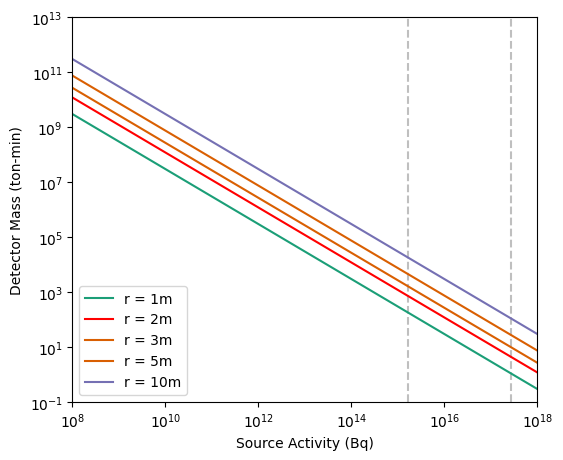

In [18]:
plt.figure(figsize=(6,5))
plt.xlim(10**8, 10**18)
plt.ylim(10**(-1), 10**13)

plt.axvline(x=case1, color='grey', ls='dashed', alpha=0.5)
plt.axvline(x=case2, color='grey', ls='dashed', alpha=0.5)
plt.plot(M_s_new, M_dec_r1, color='#1b9e77', label='r = 1m')
# plt.plot(M_s_new, M_dec_r2, color='red', label='r = 2m')
# plt.plot(M_s_new, M_dec_r3, color='#d95f02', label='r = 3m')
plt.plot(M_s_new, M_dec_r4, color='#d95f02', label='r = 5m')
plt.plot(M_s_new, M_dec_r5, color='#7570b3', label='r = 10m')

plt.legend()
plt.xlabel('Source Activity (Bq)')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Detector Mass (ton-min)')
plt.savefig(source + '_results.pdf')

Calculator

In [19]:
md = constant_term * 1**2 * 1000000/(case2*60*1000000)
print("Case 2 Detection @ 1m: " + str(md))
md = constant_term * 5**2 * 1000000/(case2*60*1000000)
print("Case 2 Detection @ 5m: " + str(md))

md_2 = constant_term * 1**2 * 1000000/(case1*60*1000000)
print("Case 1 Detection @ 1m: " + str(md_2))
md_2 = constant_term * 5**2 * 1000000/(case1*60*1000000)
print("Case 1 Detection @ 5m: " + str(md_2))

Case 2 Detection @ 1m: 185.20536674700048
Case 2 Detection @ 5m: 4630.134168675012
Case 1 Detection @ 1m: 1.1159543470657287
Case 1 Detection @ 5m: 27.89885867664321
